<a href="https://colab.research.google.com/github/Chushion/Chushion/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 간단한 실습 예제

from https://blog.naver.com/okkam76/221919274832


강의에서 딥러닝을 처음 접하게 되어, 보다 쉽게 딥러닝을 다룬 예제를 통하여 개념을 정립하고 넘어가고자 하였다.

이에, 각종 포털사이트를 통하여 적합한 예제를 검색하였고, 해당 블로그의 글이 직관적으로 이해하기에 가장 좋다고 생각하여 이를 HW2로서 가져와 보았다.

## 데이터셋 준비

#### x값 데이터 만들기
numpy 라이브러리를 통하여 -10부터 9까지의 20개의 정수 배열을 만든다. 

이후, 변수 x에 저장한다.

In [102]:
import numpy as np

In [103]:
x = np.arange(-10, 10, 1)

In [104]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

#### y값 데이터 만들기

일차함수 y = 2x-1을 사용하여 변수 y를 만든다.

In [105]:
y = 2*x - 1

In [106]:
y

array([-21, -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,
         5,   7,   9,  11,  13,  15,  17])

#### 그래프

matplotlib 라이브러리를 통해 
x, y의 그래프를 그린다.

이를 통해 x와 y의 관계를 시각적으로 확인해본다.

In [107]:
import matplotlib.pyplot as plt

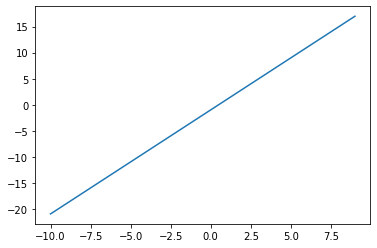

In [108]:
plt.plot(x,y)

#### x 배열 원소값의 순서를 무작위로 바꾸기

x 배열의 순서를 random하게 바꾸고,이에 매칭되는 y값을 순서대로 배열한다.

In [109]:
print("x 배열의 원소 개수: ", x.shape[0])

x 배열의 원소 개수:  20


In [110]:
idx = np.arange(x.shape[0])

In [111]:
print("기존 인덱스: ", idx)

기존 인덱스:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [112]:
np.random.shuffle(idx)

In [113]:
print("섞인 인덱스: ", idx)

섞인 인덱스:  [13  2 12 14  8 17  7 11 19 18  0  6  4  1 16 10 15  5  9  3]


In [114]:
x = x[idx]
y = y[idx]

In [115]:
print ("x: ", x)
print ("y: ", y)

x:  [  3  -8   2   4  -2   7  -3   1   9   8 -10  -4  -6  -9   6   0   5  -5
  -1  -7]
y:  [  5 -17   3   7  -5  13  -7   1  17  15 -21  -9 -13 -19  11  -1   9 -11
  -3 -15]


#### 차원 변환

1차원 형태의 x 배열을 2차원 형태로 변환한다.

일반적으로 머신러닝 알고리즘에서 x 변수의 데이터 값 배열은 가로 방향으로 긴 형태가 아니라 세로 방향으로 긴 형태로 만들기 때문이다.

In [116]:
x_new = x.reshape(-1, 1)
x_new

array([[  3],
       [ -8],
       [  2],
       [  4],
       [ -2],
       [  7],
       [ -3],
       [  1],
       [  9],
       [  8],
       [-10],
       [ -4],
       [ -6],
       [ -9],
       [  6],
       [  0],
       [  5],
       [ -5],
       [ -1],
       [ -7]])

## 선형회귀모델 (sklearn)

#### 필요한 라이브러리 불러오기

사이킷런(sklearn) 라이브러리를 통해 선형회귀분석을 진행할 준비를 한다.

LinearRegression 클래스 함수를 통해 선형회귀분석을 처리한다.

In [117]:
from sklearn.linear_model import LinearRegression

#### 머신러닝 모델 객체 정의하기

LinearRegression 클래스 객체를 정의하여 변수 lr에 저장한다.

LinearRegression 클래스 함수의 인수에 다양한 파라미터를 설정할 수 있다. \
(y-intercept를 계산하지 않거나, 모델 학습에 사용할 CPU 개수 지정 등에 사용할 수 있다)


In [118]:
lr = LinearRegression()

#### 주어진 데이터로 모델 학습시키기

앞서, y = 2x-1이라는 식을 정의한 바 있다.

fit Method를 통해, 예측값의 오차가 가장 작은 함수 관계식을 찾는다.

In [119]:
lr.fit(x_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
print("기울기: ", lr.coef_)
print("y절편: ", lr.intercept_)

기울기:  [2.]
y절편:  -0.9999999999999996


#### 새로운 x 데이터에 대한 y값 예측하기

훈련을 마친 선형회귀 모델을 이용하여 새로운 데이터에 대한 목표값을 예측한다.

x_test 변수에 새로운 데이터 셋을 저장하고, 11~15 범위의 정수를 모델의 x 변수 입력 형태에 맞게 입력한다.

In [121]:
x_test = np.arange(11, 16, 1). reshape(-1, 1)
x_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

predict Method를 통해 y값을 예측한다.

예측값을 y_hat 변수에 저장한다.

In [122]:
y_hat = lr.predict(x_test)
y_hat

array([21., 23., 25., 27., 29.])

## Tensorflow, Keras

데이터 분포가 복잡한 경우, \
선형관계를 인식하지 못한 상태에서도 머신러닝 또는 딥러닝 학습을 통해 관계를 찾아낼 수 있다. 

즉, 복잡하거나 잘 드러나지 않는 패턴을 찾을 수 있는 것이다.

#### Tensorflow(Keras) 불러오기

In [123]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

#### 딥러닝 모델 객체 정의하기

Sequential 클래스 함수를 사용하여 신경망 객체를 생성한다.

이는 심층신경망(DNN)을 구성할 때 사용한다.

또한, compile 명령어를 사용하여, optimizer 함수와 loss함수를 정의한다. \
(optimizer 함수는 오차를 줄이는 데에 사용하는 최적화 알고리즘이고, loss 함수는 예측값의 오차를 측정하는 기준이 된다.)

In [124]:
dnn = keras.Sequential()

In [125]:
dnn.add(Dense(units=1, input_shape=(1,)))

In [126]:
dnn.compile(optimizer='sgd', loss='mse')

summary 명령을 이용하여 인공신경망의 구조를 확인한다.

In [127]:
dnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### 주어진 데이터로 모델 학습시키기
학습을 위한 설명변수 데이터(x_new)와 목표값인 타겟 레이블 데이터(y)를 신경망 모델에 주입하고 학습한다.

학습 과정을 통해서 목표값과 예측값의 오차가 가장 작은 함수 관계식을 찾는다.

2개의 파라미터 값을 조금씩 변화시키면서 최적화된 해를 찾는 것이다.

7주차 강의에서 정의한 바와 같이, epochs = 10은 이와 같은 학습 과정을 10번 반복한다는 것이다.

In [128]:
dnn.fit(x_new, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 279ms/step - loss: 458.6675
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 50.6545
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 6.2337
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3724
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8162
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7295
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6949
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6669
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6407
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6155


새로운 x데이터에 대한 y값 예측하기

x_test 변수의 데이터를 모델에 주입한다.

predict Method를 사용하여 y값을 예측한다.

In [129]:
y_hat_dnn = dnn.predict(x_test)

In [130]:
y_hat_dnn

array([[21.901806],
       [23.913622],
       [25.925436],
       [27.937252],
       [29.949066]], dtype=float32)

\

# 타이타닉 생존자 예측

from http://melonicedlatte.com/datascience/2019/10/19/140600.html

앞서 직관적이고 쉬운 예제로 딥러닝을 이해해 보았다.

그렇다면, 실생활에서 이는 어떻게 적용될 수 있을까? 

가장 유명한 예제인 '타이타닉 생존자 예측'을 통하여 이를 실행해보았다.

#### Introduction & Data 확인

In [131]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
train_x = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/titanic/train.csv", sep=',')
test_x = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/titanic/test.csv", sep=',')

데이터 구조 확인

In [133]:
train_x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


값이 들어가지 않은 데이터의 수 확인

In [134]:
train_x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualization (시각화)

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

하기 그래프를 통해 60% 이상의 1등석 승객들이 살고, 30% 미만의 3등석 승객들이 사망한 것을 확인할 수 있다.

이는 좋은 지표이다.

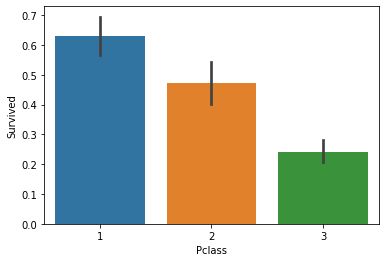

In [136]:
sns.barplot(x="Pclass", y="Survived", data=train_x);

하기 그래프를 통해, 성별과 생존 여부 간의 관계를 확인할 수 있다. 

여성은 70% 이상이 생존한 반면, 남성은 20% 정도만 생존한 것을 알 수 있다.

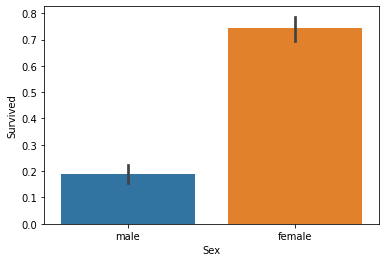

In [137]:
sns.barplot(x="Sex", y="Survived", data=train_x);

make_bins Method를 이용하는 것도 가능하지만, \
대신에 seaborn 함수를 사용하여 나이와 생존 여부 간의 관계를 확인한다.

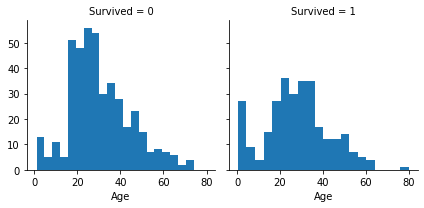

In [138]:
g = sns.FacetGrid(train_x, col='Survived')
g.map(plt.hist, 'Age', bins=20);

#### Adding a feature of our own

우리는 상기 시각화를 통해 유의미한 변수들을 골라냈다.
(위에서 언급되지 않은 변수들은 시각화 과정에서 걸러낸 변수들이다) \

하지만, 이름이라는 변수는 위애서 검토하지 않았다.

이름이라는 변수는 생존의 원인이 되기 어렵다. 하지만, 변수를 세심하게 살펴보면 흥미로운 특징을 발견할 수 있다.

In [139]:
train_x.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


이름은 단순히 이름만을 명시하는 것이 아니라, Mr, Mrs와 같은 호칭도 명시되어 있다는 것을 파악할 수 있다.

귀족이 구명 보트에 더 먼저 탑승할 것이라는 가설을 세워볼 수 있는 것이다.

우리는 정규 표현식을 사용할 수 있는 Pandas의 특성을 통해 이에 대해서 빠르게 파싱해볼 수 있다.

In [140]:
train_x['Title'] = train_x.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [141]:
train_x['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Lady          1
Capt          1
Don           1
Mme           1
Countess      1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

거의 나타나지 않는 값을 제거한다.
거의 나타나지 않는 모든 값들을 'Rare'로 묶고,

'Ms'와 'Mile'을 'Miss'로 통합한다.
또한, 'Mme'를 'Mrs'로 통합한다.

In [142]:
train_x['Title'] = train_x['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                             'Rare')
train_x['Title'] = train_x['Title'].replace('Mlle', 'Miss')
train_x['Title'] = train_x['Title'].replace('Ms', 'Miss')
train_x['Title'] = train_x['Title'].replace('Mme', 'Mrs')

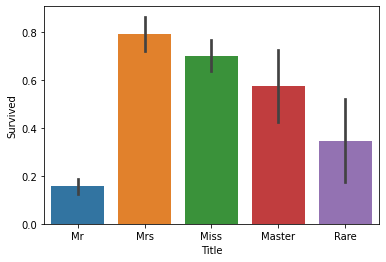

In [143]:
sns.barplot(x="Title", y="Survived", data=train_x);

상기 그래프를 통해 확인해본 결과, 추가로 정보를 얻을 수 있었다.

남자는 일반적으로 살아남지 못했음에도, 귀족(Master)의 타이틀을 가지고 있는 사람은 거의 60%가 생존하였다.

'Rare' 호칭을 가진 남성은 조금 더 생존하였다.

호칭이라는 변수가 의미를 가지는 것을 발견하였기에, 이를 숫자 형태로 바꾸어 모델에 맞추어보자.

In [144]:
_, train_x['Title'] = np.unique(train_x['Title'], return_inverse=True)

In [145]:
train_x['Title'].head(10)

0    2
1    3
2    1
3    3
4    2
5    2
6    2
7    0
8    3
9    3
Name: Title, dtype: int64

상기 분석들을 통해, '좌석 등급', '성별'이 의미있는 indicator인 것을 확인하였다.

'나이'는 그닥 좋은 변수인지는 모르겠으나, 필요하다면 추가할 것을 염두에 두고 분석을 시작해볼 수 있다.

#### Cleaning Up (데이터 전처리)

Data set을 정돈해보자.

필요 없는 Column을 정리하고, \
null 값을 모두 제거한 뒤, \
성별이라는 변수를 숫자로 바꿀 것이다.

In [146]:
train_x.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

In [147]:
train_x.dropna(inplace=True)

In [148]:
_, train_x['Sex'] = np.unique(train_x['Sex'], return_inverse=True)

이러한 데이터를 모델에 집어 넣기 위하여 \
특징과 타겟을 나누고, \
타겟 리스트의 배열을 정돈한다.


In [149]:
train_y = np.ravel(train_x.Survived) # Make 1D
train_x.drop(['Survived'], inplace=True, axis=1)

#### Keras Model (케라스 모델)

우리는 분류 문제를 다루고 있기 때문에 Logistic Regression에서 사용하는 sigmoid 레이어를 사용할 것이다.

하지만 이 전에, 2개의 fully-connected 레이어 Relu 활성화 함수를 사용하여 추가하였다.

In [150]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

그 후, network를 compile한다.

두 개의 target classes가 있기 때문에, binary cross-entorpy loss function을 사용한다.

adam optimizer는 gradien-descent option의 default로, 좋은 성능을 발휘한다.

또한, 평가기준은 accuracy를 사용한다.

In [151]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model을 주어진 데이터에 대하여 fit시키는 것으로 해당 실습을 마무리할 수 있다.

In [152]:
model.fit(train_x, train_y, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
891/891 [==============================] - 1s 1ms/step - loss: 0.6206 - accuracy: 0.6434
Epoch 2/50
891/891 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7736
Epoch 3/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4911 - accuracy: 0.7902
Epoch 4/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4658 - accuracy: 0.7839
Epoch 5/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4789 - accuracy: 0.7764
Epoch 6/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4349 - accuracy: 0.7842
Epoch 7/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.7732
Epoch 8/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4564 - accuracy: 0.7881
Epoch 9/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4483 - accuracy: 0.7933
Epoch 10/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.7950

약 80% 정도의 정확도를 보여주는 것을 볼 수 있다. \

test 데이터 셋을 준비하여, 이를 test 하고 해당 실습을 마무리 지을 수 있다.

In [153]:
to_test = test_x.copy(True)

# Add Title
to_test['Title'] = to_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
to_test['Title'] = to_test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                                'Rare')
to_test['Title'] = to_test['Title'].replace('Mlle', 'Miss')
to_test['Title'] = to_test['Title'].replace('Ms', 'Miss')
to_test['Title'] = to_test['Title'].replace('Mme', 'Mrs')

_, to_test['Title'] = np.unique(to_test['Title'], return_inverse=True)

# Clean Data
to_test = to_test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin',\
                        'PassengerId', 'Fare', 'Age'], axis=1)
_, to_test['Sex'] = np.unique(test_x['Sex'], return_inverse=True)

In [154]:
predictions = model.predict_classes(to_test).flatten()
predictions[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0], dtype=int32)

In [155]:
submission = pd.DataFrame({
    "PassengerId": test_x["PassengerId"],
    "Survived": predictions
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
